In [1]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot
import geopandas as gpd
import os, math
from matplotlib import pyplot as plt

In [2]:
geotiffPath = 'L7_ETM/LE71240522001002EDC00/'
NDWI2 = rasterio.open(geotiffPath + 'NDWI2.TIF')

In [3]:
vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 5, 5
ho_tri_an = df[df.AREA_SKM == 277.4]

## Find Rectangle that can bound!

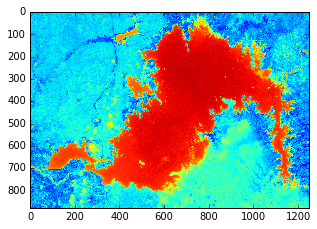

In [4]:
from utils.landsatHepers import *
ndwi2, original_transform = getMaskFromShape(ho_tri_an, NDWI2, eps=2000)
plt.imshow(ndwi2)

## Segmentation based on BFS

Area = 296.9532


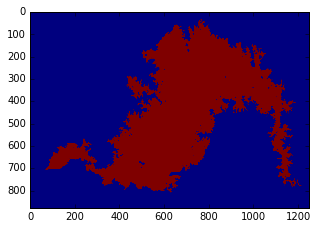

In [5]:
area, segment_array = countPixel(ndwi2, 'NDWI2', [600, 700])
print("Area = {0}".format(area * 900 / 1000000))
plt.imshow(segment_array)

Normalize Segmented file

In [6]:
segment_array = normalizePixelOnBoundaries(segment_array)

## Find Boundaries of Image

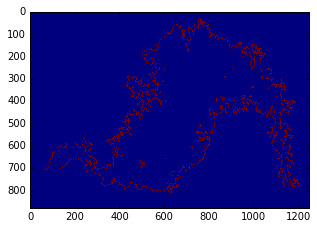

In [7]:
boundaries_array = findBoundariesFromSegmentedArray(segment_array)
plt.imshow(boundaries_array)

Depends all boundaries found, choose the most similar to original.

In [8]:
__shape = getMostSimilarShape(boundaries_array, original_transform, ho_tri_an)

## Try to convert to original coordinates and Masking

In [9]:
new_shape_in_original_coordinates = [transform_geom(NDWI2.crs, df.crs, mapping(__shape))]

In [12]:
new_shape = shape(new_shape_in_original_coordinates[0])
new_geom = mapping(new_shape)
new_shape = [transform_geom(ho_tri_an.crs, NDWI2.crs, new_geom)]

In [13]:
ho_tri_an_shape = ho_tri_an.geometry.values[0]
ho_tri_an_geom = mapping(ho_tri_an_shape)
ho_tri_an_shape = [transform_geom(ho_tri_an.crs, NDWI2.crs,ho_tri_an_geom)]

In [14]:
original_geom = ho_tri_an.geometry.values[0]
processed_geom = shape(new_shape_in_original_coordinates[0])

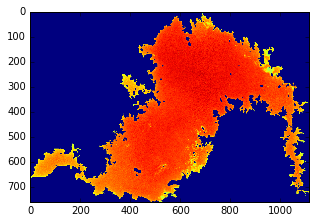

In [15]:
ndwi2_origin, _ = rasterio.mask.mask(NDWI2, ho_tri_an_shape, crop=True)
ndwi2_processed, _ = rasterio.mask.mask(NDWI2, new_shape, crop=True)
ndwi2_origin = ndwi2_origin.squeeze()
ndwi2_processed = ndwi2_processed.squeeze()
plt.imshow(ndwi2_processed)

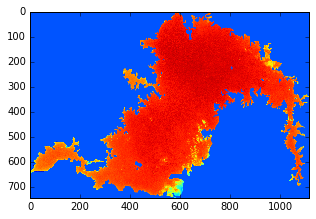

In [16]:
plt.imshow(ndwi2_origin)